In [1]:
# Parameters
TEST = True
QUICK_RUN = True


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

import sys

In [3]:
from wordcloud import WordCloud

In [4]:
import sys
sys.path.insert(0,"/usr/local/lib/python3.9/site-packages")
import pymysql
from textblob import TextBlob
import plotly as px

In [5]:
import os

host_name = os.getenv('host_name')
passwd = os.getenv('aws_password')
user='group2'
database='group2db'

In [6]:
con = pymysql.connect(host=host_name,user=user,passwd=passwd,db=database)


In [7]:
# Connecting AWS mysql Database
db = pymysql.connect(host_name, user, passwd, database)

In [8]:
cursor = db.cursor()

In [9]:
# Reading sql table into pandas DataFrame
tweet_df = pd.read_sql_query('''select * from tweets_locations''', con)

In [10]:
tweet_df

,tweet_id,tweet,location
0,1,"RT @JoeBiden: Folks, I just received the secon...",Michigan
1,2,RT @charles_gaba: Holy shit. They’re holding v...,Ohio
2,3,"I will be, Mr. President. Need to know when th...",Massachusetts
3,4,"RT @rmslim: Friends, all of whom are physician...",New York
4,5,RT @KyleLacio: McMaster is skipping the grocer...,New Jersey
...,...,...,...
4577,4578,.@MEPublicHealth @newscentermaine Retired nurs...,Maine
4578,4579,RT @NationHahn: I loved hearing about @NCHealt...,North Carolina
4579,4580,Can Flu Vaccine Increase COVID Risk? • Childre...,Texas
4580,4581,RT @yattypat: Mexican doctor hospitalized afte...,Texas


In [11]:
tweet_df = tweet_df.drop(columns=['tweet_id'], axis=1)

In [12]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4582 entries, 0 to 4581
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweet     4582 non-null   object
 1   location  4582 non-null   object
dtypes: object(2)
memory usage: 71.7+ KB


In [13]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [14]:
#  Function to clean the tweets
def remove_punc(message):
    Test_punc_removed = [ char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    return Test_punc_removed_join
tweet_df['tweet'] = tweet_df['tweet'].apply(remove_punc)
tweet_df

,tweet,location
0,RT JoeBiden Folks I just received the second d...,Michigan
1,RT charlesgaba Holy shit They’re holding vacci...,Ohio
2,I will be Mr President Need to know when the h...,Massachusetts
3,RT rmslim Friends all of whom are physicians w...,New York
4,RT KyleLacio McMaster is skipping the grocery ...,New Jersey
...,...,...
4577,MEPublicHealth newscentermaine Retired nurses ...,Maine
4578,RT NationHahn I loved hearing about NCHealthNe...,North Carolina
4579,Can Flu Vaccine Increase COVID Risk • Children...,Texas
4580,RT yattypat Mexican doctor hospitalized after ...,Texas


In [15]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','will','aap','co','day','user','tweet','today','week','year', 'https','httpstco', 'rt', 'RT'])

In [16]:
# Function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# Creating two new columns Subjectivity, Polarity
tweet_df['Subjectivity'] = tweet_df['tweet'].apply(getSubjectivity)
tweet_df['Polarity'] = tweet_df['tweet'].apply(getPolarity)

In [17]:
tweet_df

,tweet,location,Subjectivity,Polarity
0,RT JoeBiden Folks I just received the second d...,Michigan,0.333333,0.270833
1,RT charlesgaba Holy shit They’re holding vacci...,Ohio,0.800000,-0.200000
2,I will be Mr President Need to know when the h...,Massachusetts,0.540000,0.160000
3,RT rmslim Friends all of whom are physicians w...,New York,0.000000,0.000000
4,RT KyleLacio McMaster is skipping the grocery ...,New Jersey,0.000000,0.000000
...,...,...,...,...
4577,MEPublicHealth newscentermaine Retired nurses ...,Maine,0.916667,0.216667
4578,RT NationHahn I loved hearing about NCHealthNe...,North Carolina,0.800000,0.700000
4579,Can Flu Vaccine Increase COVID Risk • Children...,Texas,0.000000,0.000000
4580,RT yattypat Mexican doctor hospitalized after ...,Texas,0.000000,0.000000


In [18]:
df_pos = tweet_df[tweet_df['Polarity'] > 0.0]
df_neg = tweet_df[tweet_df['Polarity'] < 0.0]
df_nut = tweet_df[tweet_df['Polarity'] == 0.0]
print("Number of Positive Tweets", len(df_pos))
print("Number of Negative Tweets", len(df_neg))
print("number of Nutral Tweets", len(df_nut))

Number of Positive Tweets 2092
Number of Negative Tweets 757
number of Nutral Tweets 1733


In [19]:
# Create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return "Neutral"
    else:
        return 'Positive'

tweet_df['Analysis'] = tweet_df['Polarity'].apply(getAnalysis)
tweet_df

,tweet,location,Subjectivity,Polarity,Analysis
0,RT JoeBiden Folks I just received the second d...,Michigan,0.333333,0.270833,Positive
1,RT charlesgaba Holy shit They’re holding vacci...,Ohio,0.800000,-0.200000,Negative
2,I will be Mr President Need to know when the h...,Massachusetts,0.540000,0.160000,Positive
3,RT rmslim Friends all of whom are physicians w...,New York,0.000000,0.000000,Neutral
4,RT KyleLacio McMaster is skipping the grocery ...,New Jersey,0.000000,0.000000,Neutral
...,...,...,...,...,...
4577,MEPublicHealth newscentermaine Retired nurses ...,Maine,0.916667,0.216667,Positive
4578,RT NationHahn I loved hearing about NCHealthNe...,North Carolina,0.800000,0.700000,Positive
4579,Can Flu Vaccine Increase COVID Risk • Children...,Texas,0.000000,0.000000,Neutral
4580,RT yattypat Mexican doctor hospitalized after ...,Texas,0.000000,0.000000,Neutral


Text(0.5, 1.0, 'Twitter Sentiment Analysis')

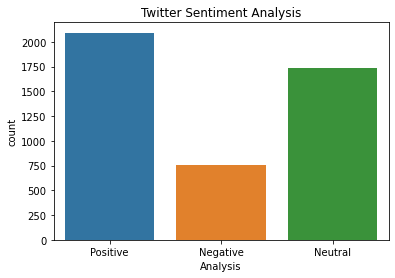

In [20]:
sns.countplot(tweet_df['Analysis']).set_title('Twitter Sentiment Analysis')

<Figure size 1440x1440 with 0 Axes>

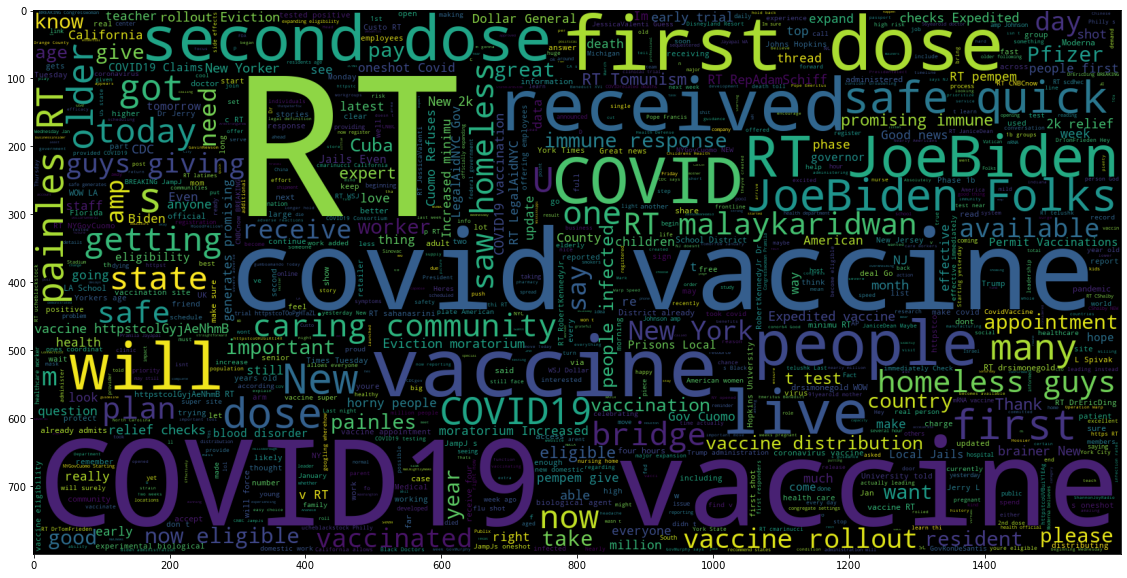

In [21]:
#positive sentiment
plt.figure(figsize= (20, 20))
wc = WordCloud(max_words = 900, width = 1600, height = 800).generate(" ".join(tweet_df[tweet_df['Polarity'] > 0.0]['tweet']))
plt.figure(figsize=(20, 10), facecolor='white', edgecolor='blue')

plt.imshow(wc)

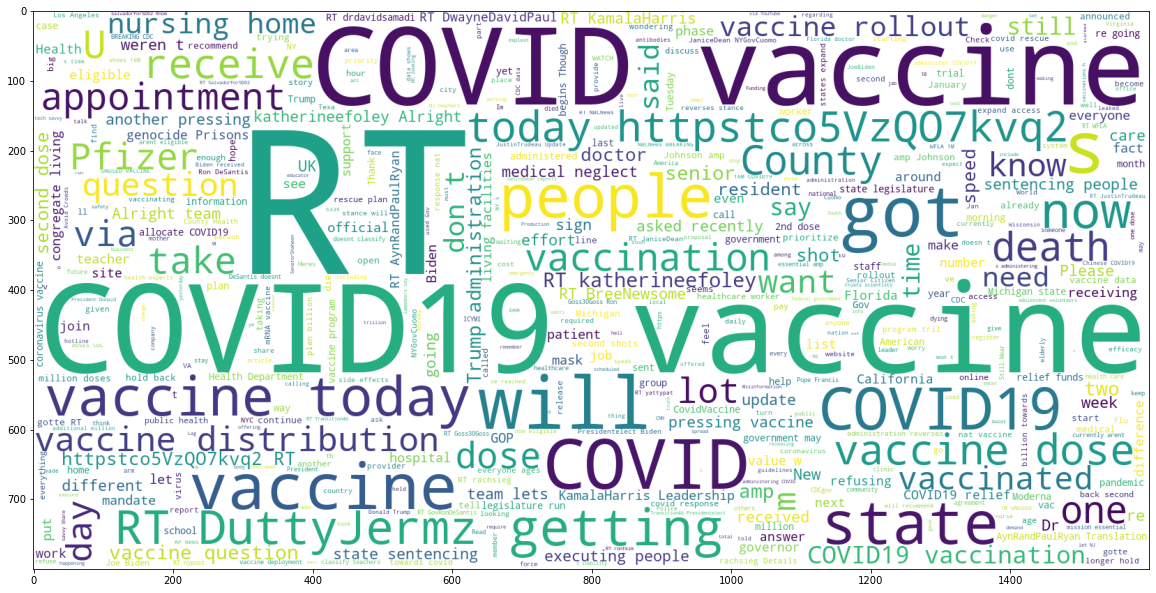

In [22]:
# nutral sentiment word cloud

plt.figure(figsize= (20, 20))
wc = WordCloud(background_color='white', max_words = 500, width = 1600, height = 800).generate(" ".join(tweet_df[tweet_df['Polarity'] == 0.0]['tweet']))
plt.imshow(wc)

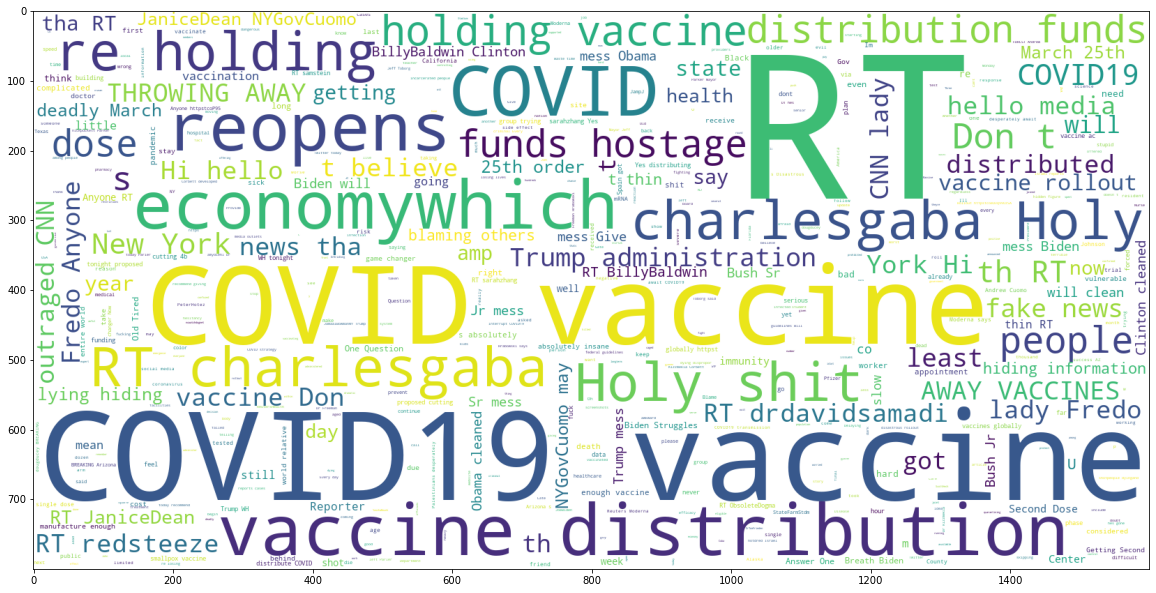

In [23]:
# negative sentiment word cloud

plt.figure(figsize= (20, 20))
wc = WordCloud(background_color='white', max_words = 500, width = 1600, height = 800).generate(" ".join(tweet_df[tweet_df['Polarity'] < 0.0]['tweet']))
plt.imshow(wc)

In [24]:
list_of_words = []

for i in tweet_df['tweet']:
    for j in i:
        list_of_words.append(j)

In [25]:
total_words = len(list(set(list_of_words)))
total_words

132

In [26]:
# split the data into test and train

X = tweet_df['tweet']
y = tweet_df['Polarity']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [27]:
X_train.shape

(4123,)

In [28]:
X_test.shape

(459,)